# Kyphosis-Project using Decision Tree and Random Forest

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Get the data**

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [4]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## About Data

* So, this dataset essentially repreasents a number of patients who had 'Kyphosis' which is a spinal disorder condition and then they had operations.
* This state of frame basically represents, whether or not the Kyphosis was absent or present after the operation.
* **Age** - Age of the person in the months.
* **Number** - Number of vertebrae involved in operation.
* **Start** - Start was the number of the first or top most vertebrae that was operated on.

# Exploratory Data Analysis (EDA)

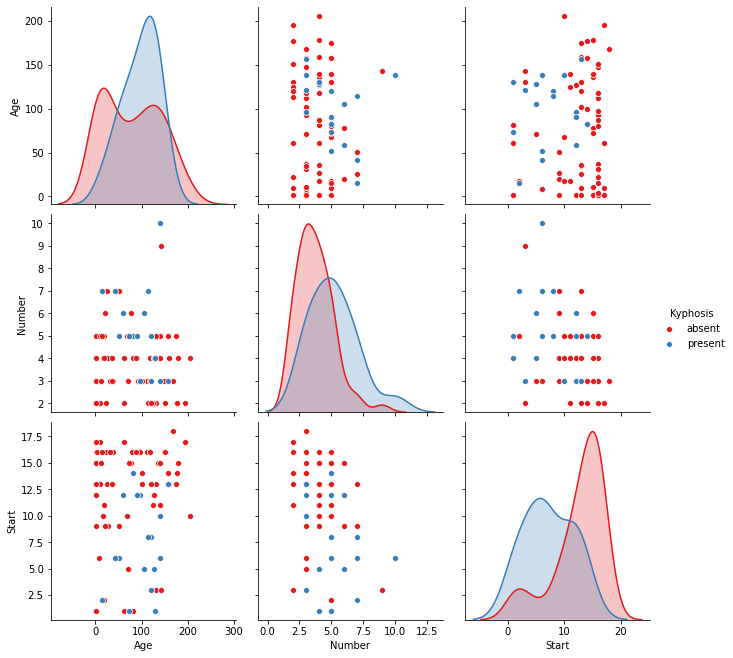

In [5]:
# We'll just check out a simple pairplot for this small dataset.
sns.pairplot(df, hue='Kyphosis', palette='Set1', height=3)

## Train Test Split

Let's split up the data into a training set and a test set!

In [6]:
# Import the model
from sklearn.model_selection import train_test_split

In [7]:
# Define Feature matrix
# Dimension : (81x3)
X = df.drop('Kyphosis',axis=1)

In [8]:
# Define Output vector
# Dimension : (81x1)
y = df['Kyphosis']

In [9]:
# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [10]:
# Training feature matrix
# Dimension : (56x3)
X_train.head()

,Age,Number,Start
74,11,3,15
54,140,4,15
1,158,3,14
71,127,4,12
45,139,3,10


In [11]:
# Training output vector
# Dimension : (56x1)
y_train.head()

74     absent
54     absent
1      absent
71     absent
45    present
Name: Kyphosis, dtype: object

In [12]:
# Test feature matrix
# Dimension : (25x3)
X_test.head()

,Age,Number,Start
33,112,3,16
61,114,7,8
21,105,6,5
32,130,5,13
20,22,2,16


In [13]:
# Test output vector
# Dimension : (25x1)
y_test.head()

33     absent
61    present
21    present
32     absent
20     absent
Name: Kyphosis, dtype: object

In [14]:
##### Dimensions #####
# df = (81x4)
# X_train = (56x3)
# y_train = (56x1)
# X_test = (25x3)
# y_test = (25x1)

## Decision Trees

We'll start just by training a single decision tree.

In [15]:
# Import the model for Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier

In [16]:
# Create a 'DecisionTreeClassifier' object
dtree = DecisionTreeClassifier()

In [17]:
# Now train our model with training data (X_train, y_train)
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

**Now our model has been trained**

## Prediction and Evaluation 

Let's make predictions and evaluate our decision tree.

In [18]:
# Now make predictions with our test data (X_test)
predictions = dtree.predict(X_test)

In [19]:
predictions

array(['absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent'], dtype=object)

In [20]:
# Import the model for classification_report and confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
# Print confusion matrix with 'y_test' and 'predictions'
print(confusion_matrix(y_test, predictions))

[[13  4]
 [ 6  2]]


In [22]:
# Print classification report with 'y_test' and 'predictions'
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.68      0.76      0.72        17
     present       0.33      0.25      0.29         8

    accuracy                           0.60        25
   macro avg       0.51      0.51      0.50        25
weighted avg       0.57      0.60      0.58        25



## Random Forests

Now let's compare the decision tree model to a random forest.

In [23]:
# Import the model for random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Create a RandomForestClassifier model with 300 number-of-estimators (number-of-Decision-Trees)
rfc = RandomForestClassifier(n_estimators=300)

In [25]:
# Train our model with training data (X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

**Now our RandomForestClassifier model has been trained.**

## Prediction and Evaluation 

Let's make predictions and evaluate our Random Forest.

In [26]:
# Now make predictions with test data (X_test)
rfc_pred = rfc.predict(X_test)

In [27]:
rfc_pred

array(['absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [28]:
# Print confusion matrix with 'y_test' and 'predictions'
print(confusion_matrix(y_test, rfc_pred))

[[17  0]
 [ 6  2]]


In [29]:
# Print classification report with 'y_test' and 'predictions'
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



* **Here we can see that RandomForestClassifier has performed better than DecisionTreeClassifier.**
* **Here dataset is very small so there is a bit difference. But, when the dataset will be large then we see see a significant difference.**

In [30]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

* Here we can see that our dataset is also unbalanced.
* Random forest performs good on **large** and **balanced** dataset.

# Great Job !